# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
import os
import matplotlib
import warnings




#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import normaltest

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df.head(2)

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset with outliers

In [5]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\JuanHorrillo\OneDrive - IE Students\Documents\Masters\Sustainability\csvs")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('train_consolidated_230223.csv')
sample_submission = pd.read_csv('submission_230223.csv')

In [6]:
#put the same order for the columns in train_consolidated and sample_submission
train_consolidated = train_consolidated[sample_submission.columns]


In [7]:
#check nulls in sample_submission 
sample_submission.isnull().sum()


PipeId                                      0
Incidence                                   0
YearBuilt                                   0
Diameter                                    0
Length                                      0
Pressure                                    0
NumConnections                              0
NumConnectionsUnder                         0
BoolBridle                                  0
aspect                                      0
Relative_Thickness                          0
pipe_area                                   0
Total_Connections                           0
area_connection                             0
connection_bool                             0
gas_natural                                 0
Material_Acrylonitrile-Butadiene-Styrene    0
Material_Copper                             0
Material_Fiberglass-Reinforced Plastic      0
Material_Polyethylene                       0
Material_Polypropylene                      0
Diameter2                         

## Dtypes in sample submission file

In [8]:
train_consolidated.dtypes

PipeId                                        int64
Incidence                                     int64
YearBuilt                                   float64
Diameter                                    float64
Length                                      float64
Pressure                                    float64
NumConnections                                int64
NumConnectionsUnder                           int64
BoolBridle                                    int64
aspect                                      float64
Relative_Thickness                          float64
pipe_area                                   float64
Total_Connections                             int64
area_connection                             float64
connection_bool                               int64
gas_natural                                   int64
Material_Acrylonitrile-Butadiene-Styrene      int64
Material_Copper                               int64
Material_Fiberglass-Reinforced Plastic        int64
Material_Pol

In [9]:
#convert data type in YearBuilt in sample_submission to float64
sample_submission['YearBuilt'] = sample_submission['YearBuilt'].astype('float64')

## Standarizing data in sample submission

In [10]:
sample_submission.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,velocity,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,MonthsLastRev,Population density (persons/sqkm),Age_pipe_at_inspection
0,446859944,0,2012.0,0.11,44.286,0.15,0,0,0,60.39,0.733333,15.304179,0,0.0,0,1,0,0,0,1,0,0.0121,1961.249796,0.0225,0.431277,17.616667,6.6,30.8,427,0.644167,46,113.2,5.0,1.0,0.0,0.0,0.0,0.0,24.0,239.595818,9.0


In [11]:
sample_submission.columns

Index(['PipeId', 'Incidence', 'YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area', 'Total_Connections',
       'area_connection', 'connection_bool', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'velocity', 'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',
       'Yearly Sun Hours (hours)', 'No_Inspections',
       'pipe_inspected_frequently', 'No_Previous_Incidences',
       'No_Previous_Severity_High', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_Low', 'MonthsLastRev',
       'Population density (persons/sqkm)', 'Age_pipe_at_inspection'],
      dt

In [12]:
#import min max scaler
from sklearn.preprocessing import MinMaxScaler


In [13]:
#Use minmax scaler to scale these columns in sample_submission: 
# 'YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
#       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
#       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
#       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate'

scaler = MinMaxScaler()

sample_submission[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections',
       'No_Previous_Incidences','velocity', 'No_Inspections',  'MonthsLastRev','Age_pipe_at_inspection', 'Population density (persons/sqkm)']] = scaler.fit_transform(sample_submission[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections',
       'No_Previous_Incidences','velocity', 'No_Inspections',  'MonthsLastRev','Age_pipe_at_inspection', 'Population density (persons/sqkm)']])
sample_submission.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,velocity,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,MonthsLastRev,Population density (persons/sqkm),Age_pipe_at_inspection
0,446859944,0,0.823529,0.166945,0.006082,0.001563,0.0,0.0,0,0.000023,0.030079,0.002762,0.0,0.0,0,1,0,0,0,1,0,0.032364,0.000037,0.000003,0.026085,0.856269,0.77,0.644444,0.150805,0.382637,0.202532,0.832985,0.363636,1.0,0.0,0.0,0.0,0.0,0.166667,0.277505,0.173077


## Correlation matrix for sample_submission

In [14]:
# #grpah correlation matrix in sample_submission
corr_matrix = sample_submission.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
# to_drop


In [15]:
sample_submission.corr()['Incidence'].sort_values(ascending=False)


Incidence                                   1.000000
area_connection                             0.003084
Pressure                                    0.002064
Pressure2                                   0.001817
velocity                                    0.001741
aspect                                      0.000801
YearBuilt                                   0.000732
Population density (persons/sqkm)           0.000694
Material_Acrylonitrile-Butadiene-Styrene    0.000679
PipeId                                      0.000514
No_Previous_Severity_Medium                 0.000415
Length                                      0.000366
No_Inspections                              0.000325
NumConnections                              0.000254
Total_Connections                           0.000246
Average year Humidity (%)                   0.000172
connection_bool                             0.000129
pipe_area                                   0.000126
Material_Fiberglass-Reinforced Plastic      0.

In [16]:
#DROP Total_Connections IN sample_submission
sample_submission.drop(['Total_Connections'], axis=1, inplace=True)

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation matrix for sample_submission')

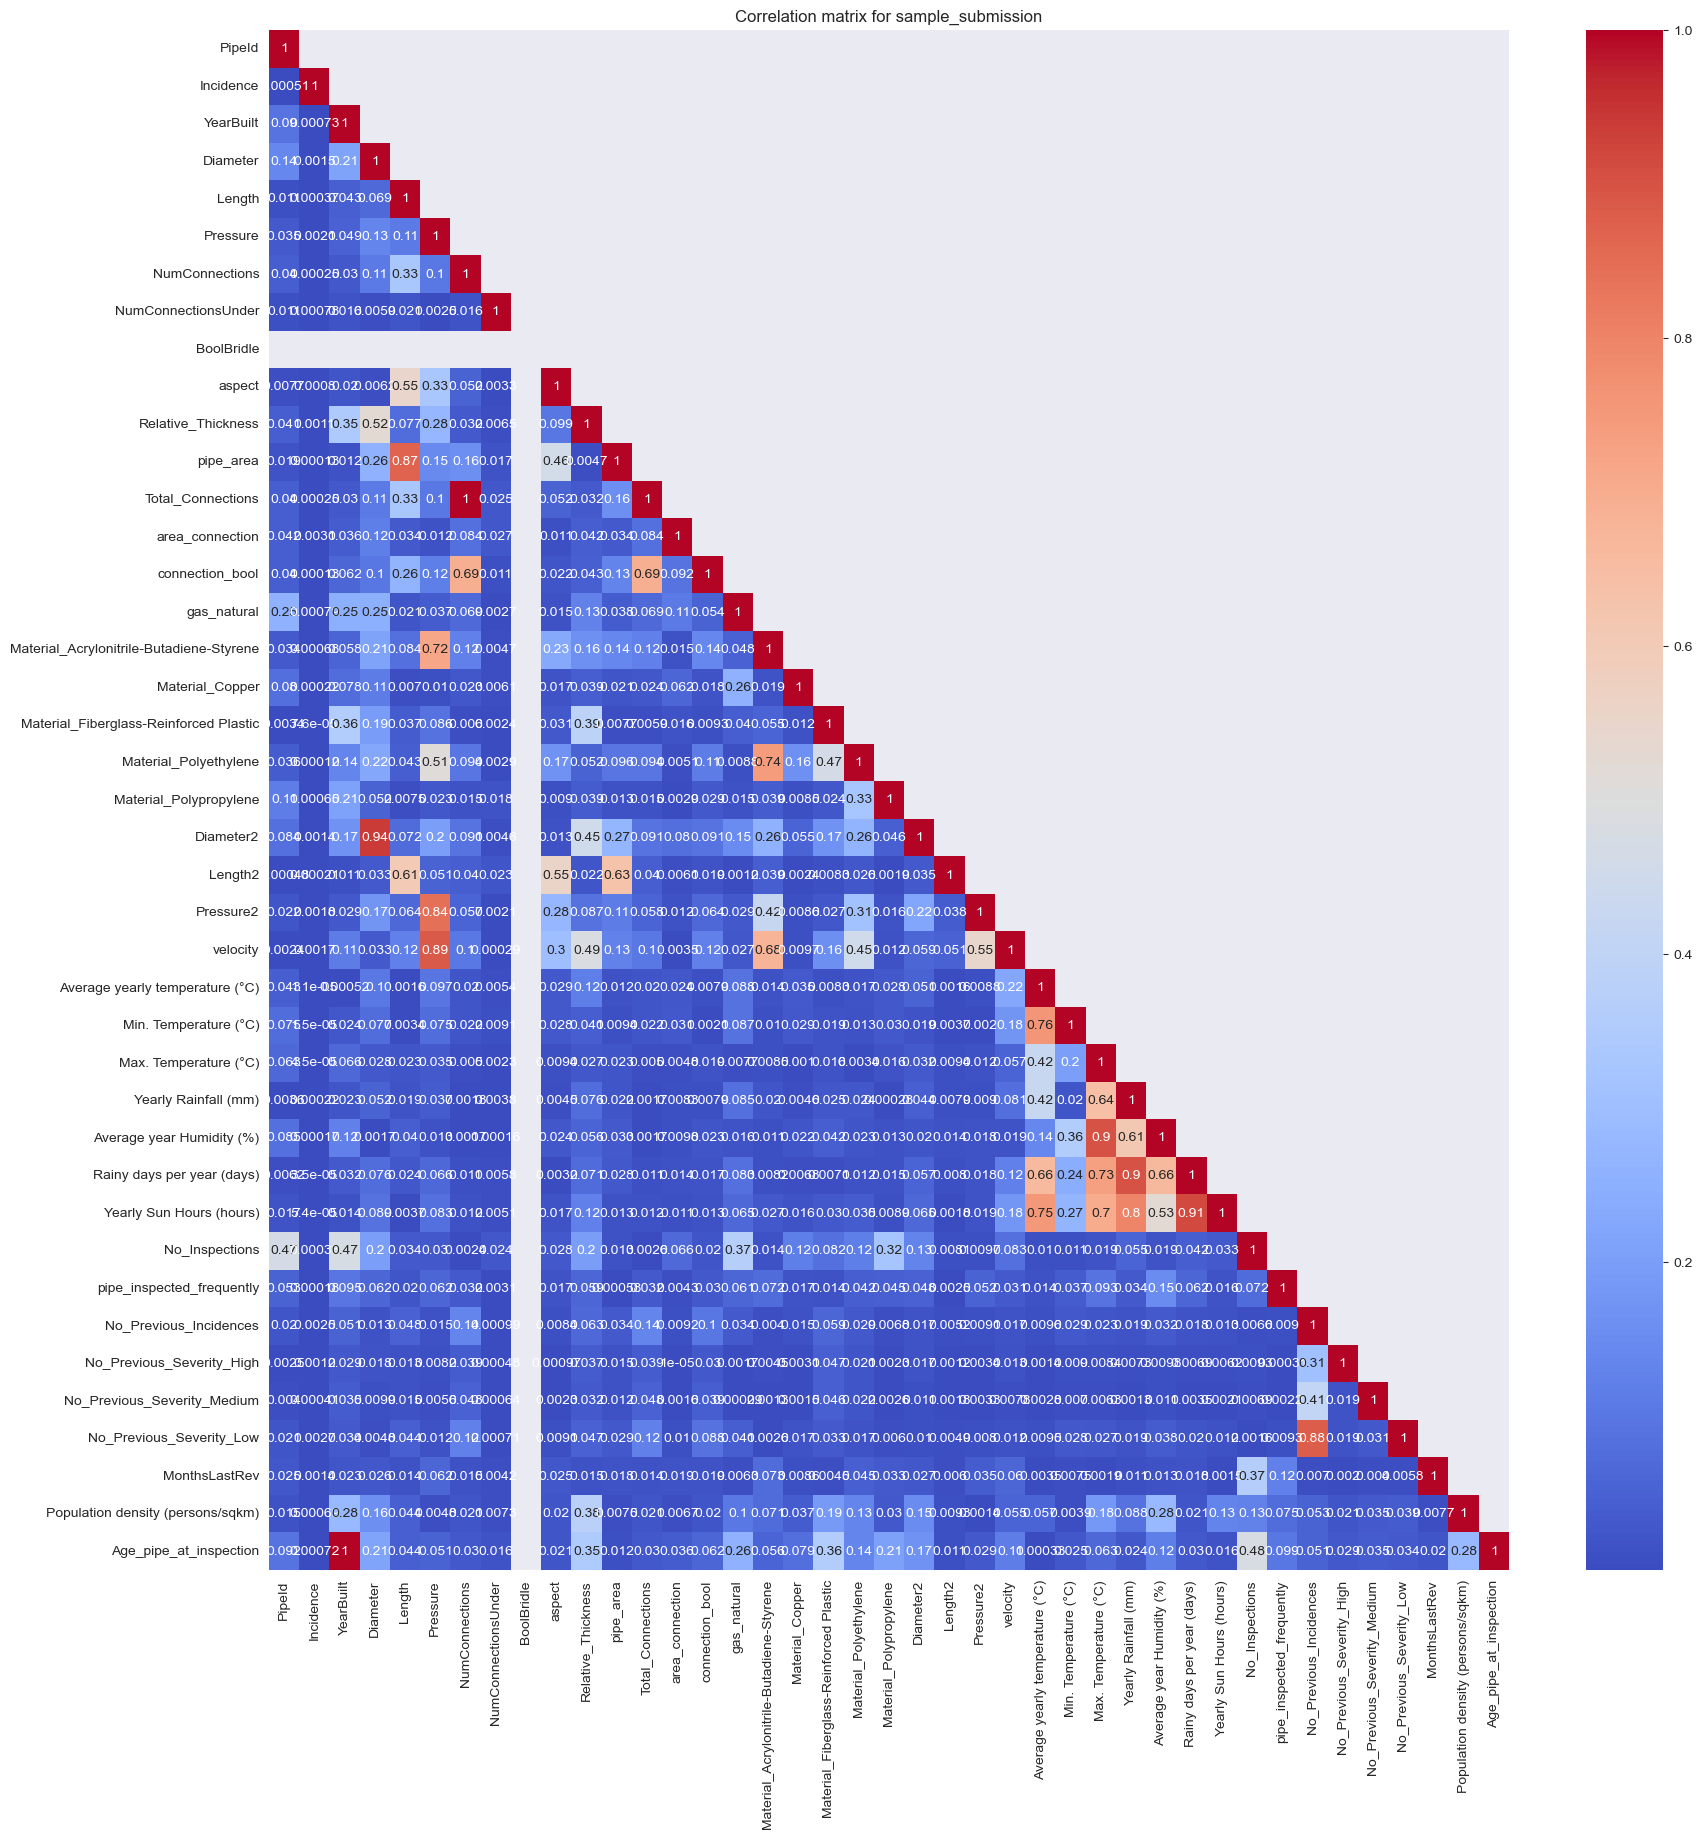

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=np.triu(corr_matrix, k=1))
plt.title('Correlation matrix for sample_submission')
plt.show()


We are not going to drop any variables as in now just for testing purposes


# Checking train file
## Nulls in train file

In [18]:
#checking nulls in train_consolidated
train_consolidated.isnull().sum()

PipeId                                      0
Incidence                                   0
YearBuilt                                   0
Diameter                                    0
Length                                      0
Pressure                                    0
NumConnections                              0
NumConnectionsUnder                         0
BoolBridle                                  0
aspect                                      0
Relative_Thickness                          0
pipe_area                                   0
Total_Connections                           0
area_connection                             0
connection_bool                             0
gas_natural                                 0
Material_Acrylonitrile-Butadiene-Styrene    0
Material_Copper                             0
Material_Fiberglass-Reinforced Plastic      0
Material_Polyethylene                       0
Material_Polypropylene                      0
Diameter2                         

## Dtypes in train_consolidated

In [19]:
train_consolidated.dtypes

PipeId                                        int64
Incidence                                     int64
YearBuilt                                   float64
Diameter                                    float64
Length                                      float64
Pressure                                    float64
NumConnections                                int64
NumConnectionsUnder                           int64
BoolBridle                                    int64
aspect                                      float64
Relative_Thickness                          float64
pipe_area                                   float64
Total_Connections                             int64
area_connection                             float64
connection_bool                               int64
gas_natural                                   int64
Material_Acrylonitrile-Butadiene-Styrene      int64
Material_Copper                               int64
Material_Fiberglass-Reinforced Plastic        int64
Material_Pol

In [20]:
train_consolidated.columns

Index(['PipeId', 'Incidence', 'YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area', 'Total_Connections',
       'area_connection', 'connection_bool', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'velocity', 'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',
       'Yearly Sun Hours (hours)', 'No_Inspections',
       'pipe_inspected_frequently', 'No_Previous_Incidences',
       'No_Previous_Severity_High', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_Low', 'MonthsLastRev',
       'Population density (persons/sqkm)', 'Age_pipe_at_inspection'],
      dt

In [21]:
#difference in columns between train_consolidated and sample_submission
set(train_consolidated.columns) - set(sample_submission.columns)


{'Total_Connections'}

## Standarizing

In [22]:
scaler = MinMaxScaler()

train_consolidated[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections',
       'No_Previous_Incidences','velocity', 'No_Inspections',  'MonthsLastRev','Age_pipe_at_inspection', 'Population density (persons/sqkm)']] = scaler.fit_transform(train_consolidated[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections',
       'No_Previous_Incidences','velocity', 'No_Inspections',  'MonthsLastRev','Age_pipe_at_inspection', 'Population density (persons/sqkm)']])
train_consolidated.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,velocity,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,MonthsLastRev,Population density (persons/sqkm),Age_pipe_at_inspection
0,489616,0,0.84,0.088481,0.000299,0.004689,0.0,0.0,0,0.000009,0.006451,0.000093,0.0,0.0,0,1,0,0,0,1,0,0.010435,8.912212e-08,0.000025,0.053987,0.590214,0.26,0.859259,0.158858,0.003215,0.278481,0.713987,0.0,1,0.0,0,0,0,0.121212,0.021409,0.02


In [23]:
#drop totalconnections in train_conslidated
train_consolidated.drop(['Total_Connections'], axis=1, inplace=True)

In [24]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()


In [25]:
df_baseline.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,velocity,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,MonthsLastRev,Population density (persons/sqkm),Age_pipe_at_inspection
0,489616,0,0.84,0.088481,0.000299,0.004689,0.0,0.0,0,0.000009,0.006451,0.000093,0.0,0,1,0,0,0,1,0,0.010435,8.912212e-08,0.000025,0.053987,0.590214,0.26,0.859259,0.158858,0.003215,0.278481,0.713987,0.0,1,0.0,0,0,0,0.121212,0.021409,0.02


In [26]:
#count values for Incidence
df_baseline['Incidence'].value_counts()


0    6331574
1      12325
Name: Incidence, dtype: int64

# Correlation in df_baseline

In [27]:
# # Correlation matrix for df_baseline
corr_matrix = df_baseline.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
# to_drop


In [28]:
#correlation numbers with target Incidence for Total_Connections', 'relative_risk', 'Probability_rate
df_baseline.corr()['Incidence'].sort_values(ascending=False)


Incidence                                   1.000000
NumConnections                              0.068107
No_Previous_Incidences                      0.049471
connection_bool                             0.049204
No_Previous_Severity_Low                    0.047841
Material_Copper                             0.027477
Population density (persons/sqkm)           0.025625
Material_Fiberglass-Reinforced Plastic      0.025278
Length                                      0.024882
Relative_Thickness                          0.024377
Age_pipe_at_inspection                      0.018001
pipe_area                                   0.014417
Max. Temperature (°C)                       0.013649
No_Previous_Severity_Medium                 0.013162
No_Previous_Severity_High                   0.010332
Yearly Sun Hours (hours)                    0.007662
area_connection                             0.005936
aspect                                      0.005536
pipe_inspected_frequently                   0.

In [29]:
# #drop Total_Connections IN df_baseline
# df_baseline.drop(['Total_Connections'], axis=1, inplace=True)


<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation matrix for df_baseline')

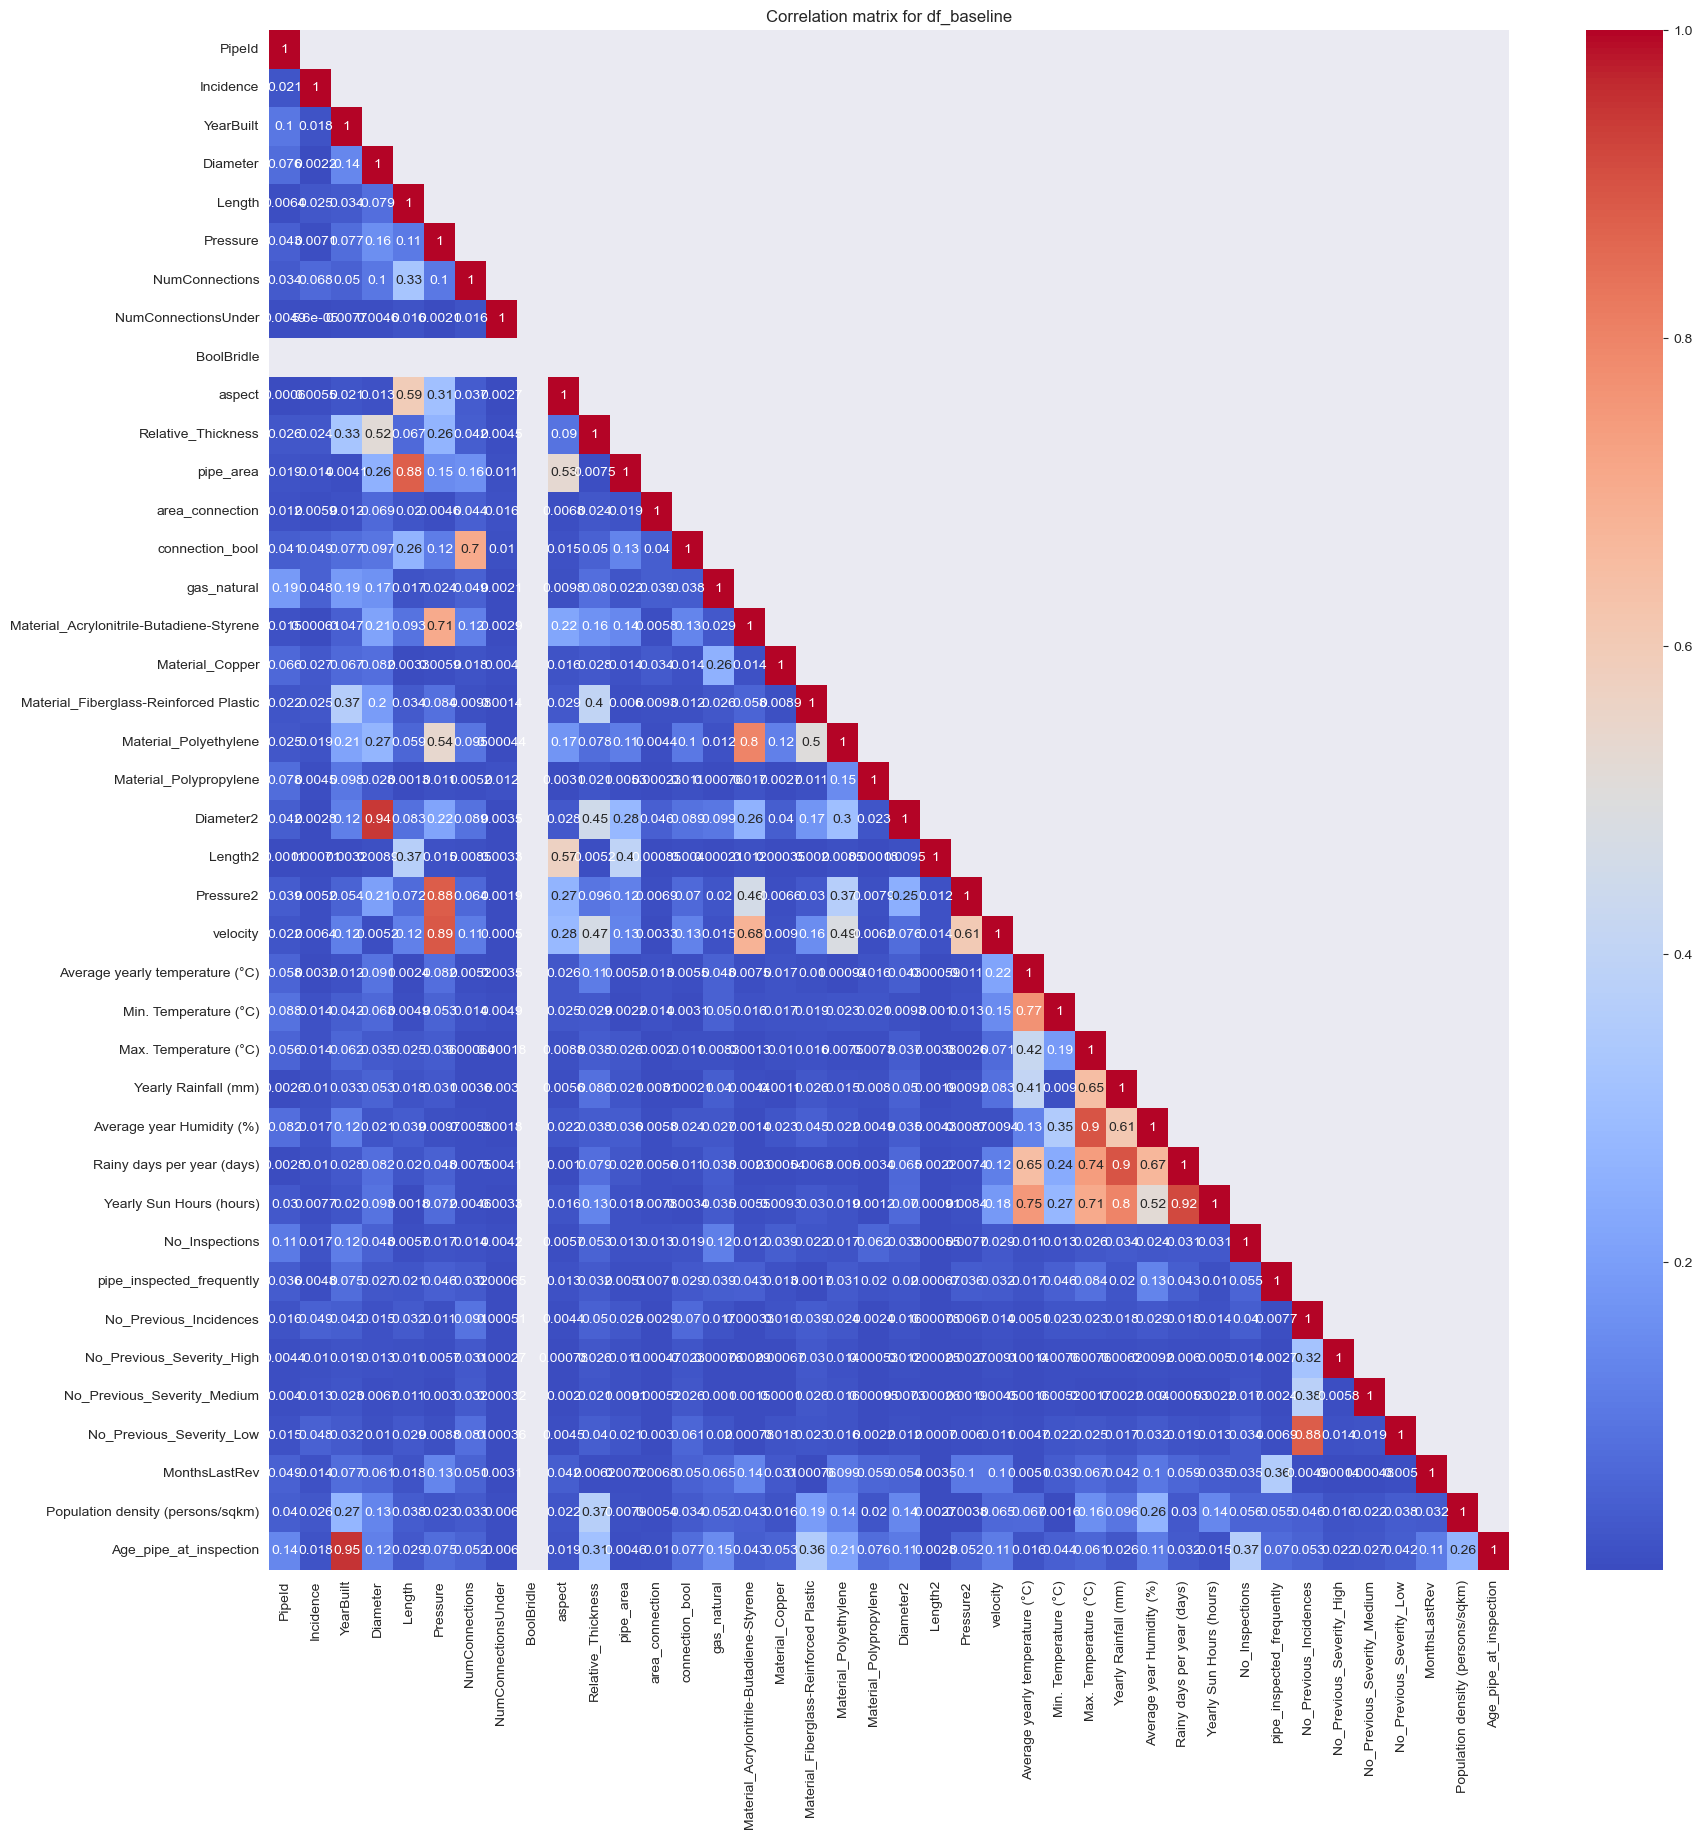

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=np.triu(corr_matrix, k=1))
plt.title('Correlation matrix for df_baseline')
plt.show()

# Approach 0: Running model with all df (best score no split)

In [31]:
#rename df_baseline as x
X = df_baseline.drop('Incidence', axis=1)
y = df_baseline['Incidence']
X_test = sample_submission.drop('Incidence', axis=1)
y_test = sample_submission['Incidence'] 

# Approach 1: Stratifying with undersampling


#undersampling the dataset
df_baseline_undersampling = df_baseline.groupby('Incidence').apply(lambda x: x.sample(df_baseline['Incidence'].value_counts().min(), random_state=42)).reset_index(drop=True)

df_baseline_undersampling['Incidence'].value_counts()


# Approach 2 : SMOTE to tackle the unbalanced dataset problem

#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence' and removing Incidence','MonthsLastRev','InspectionDay','PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',  'Province', 'Town', 'YearBuilt' for x
X = df_baseline.drop(['PipeId','Province', 'Town'], axis=1)
y = df_baseline['Incidence']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape,y_res.shape

#create a pandas dataframe with the new balanced dataset
df_baseline_balanced = pd.DataFrame(X_res, columns=X.columns)
df_baseline_balanced['Incidence'] = y_res
df_baseline_balanced.head()


#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence'
X = df_baseline.drop('Incidence', axis=1)
y = df_baseline['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#count values for Incidence in y_train
y_train.value_counts()



# Baseline approach


## Random Forest Classifier

In [32]:
del train_consolidated

# Trying a model that overfits

In [33]:
# perform pca on df_baseline and split the data into train and test 80 20stratifying by the target variable Incidence stratify=y
pca = PCA(n_components=20, random_state=42, whiten=False, svd_solver='full')
X = df_baseline.drop(['Incidence'], axis=1)
y = df_baseline['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [34]:
 #rfc and cross validation using GridSearchCV to find best parameters and validate with a validation set with InspectionYear 2018 and 2019
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=2, 
             class_weight='balanced_subsample', n_estimators=2000, max_features='auto', max_depth=13, 
             criterion='entropy', min_samples_split=2, min_samples_leaf=2, ccp_alpha = 0.01)


In [35]:
rfc.fit(X_train_pca, y_train)

#rfc.fit(X, y)
# y_pred = rfc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 2000
building tree 2 of 2000
building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000building tree 27 of 2000

building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  8.5min


building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building tree 41 of 2000
building tree 42 of 2000
building tree 43 of 2000
building tree 44 of 2000
building tree 45 of 2000
building tree 46 of 2000
building tree 47 of 2000
building tree 48 of 2000
building tree 49 of 2000
building tree 50 of 2000
building tree 51 of 2000
building tree 52 of 2000
building tree 53 of 2000
building tree 54 of 2000
building tree 55 of 2000
building tree 56 of 2000
building tree 57 of 2000
building tree 58 of 2000
building tree 59 of 2000
building tree 60 of 2000
building tree 61 of 2000
building tree 62 of 2000building tree 63 of 2000

building tree 64 of 2000
building tree 65 of 2000
building tree 66 of 2000
building tree 67 of 2000
building tree 68 of 2000
building tree 69 of 2000
building tree 70 of 2000
building tree 71 of 2000
building tree 72 of 2000
building tree 73 of 2000


In [ ]:
# #import StratifiedKFold
# from sklearn.model_selection import StratifiedKFold


In [ ]:
# #cross validation
# cv = StratifiedKFold(n_splits=3, shuffle=False, random_state=42)

In [ ]:
# #use stratified kfold to split the data into train and validation sets
# for train_index, val_index in cv.split(X, y):
#     X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[val_index]

# #fit the model
# rfc.fit(X_train, y_train)

# #predict on validation set
# y_pred = rfc.predict(X_val)

# #check accuracy score
# accuracy_score(y_val, y_pred)


In [ ]:
#for Diana's model

In [ ]:
# #gridsearchcv
# grid = GridSearchCV(estimator=rfc, cv=cv, scoring='roc_auc', verbose=2, n_jobs=-1)
# grid.fit(X, y)

# #best parameters
# grid.best_params_

# #best score
# grid.best_score_

# #best estimator
# grid.best_estimator_

# #predict on test set
# y_pred = grid.predict(X_test)


In [ ]:
# #use model to predict on test set
# predictions = rfc.predict_proba(X_test)
# predictions = predictions[:, 1]

# #show accuracy score
# print(accuracy_score(y_test, y_pred))

In [ ]:
y_pred = rfc.predict(X_test_pca)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 350 out of 350 | elapsed:   17.4s finished


              precision    recall  f1-score   support

           0       1.00      0.86      0.92   1266315
           1       0.01      0.77      0.02      2465

    accuracy                           0.86   1268780
   macro avg       0.50      0.81      0.47   1268780
weighted avg       1.00      0.86      0.92   1268780



In [ ]:
# #use rfc model to predict probabilites on pca test
# y_pred_proba = rfc.predict_proba(X_test_pca)[:,1]
# y_pred_proba

In [ ]:
# #drop incidence in sample_submission SI
sample_submission = sample_submission.drop('Incidence', axis=1)

In [ ]:
# #make predictions for submission using the model
# predictions = rfc.predict_proba(sample_submission)
# predictions = predictions[:, 1]

In [ ]:
#use rfc model to predict probabilites on sample_submission converting it first to pca with 2 components random_state=42
sample_submission_pca = pca.transform(sample_submission)
y_pred_proba = rfc.predict_proba(sample_submission_pca)[:,1]
y_pred_proba

#add the predicted probabilities to the sample_submission dataframe
sample_submission['Incidence'] = y_pred_proba
sample_submission.head(1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done 350 out of 350 | elapsed:   10.5s finished


array([0.10232133, 0.34350567, 0.10208159, ..., 0.17046795, 0.12619012,
       0.14046032])

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,velocity,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,MonthsLastRev,Population density (persons/sqkm),Age_pipe_at_inspection,Incidence
0,446859944,0.82,0.17,0.01,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.10


In [ ]:
# # #add predictions to submission SI
# sample_submission ['Incidence'] = predictions

# # #show submission
# sample_submission.head(1)

In [ ]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop(['YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area',
       'area_connection', 'connection_bool', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'velocity', 'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',
       'Yearly Sun Hours (hours)', 'No_Inspections',
       'pipe_inspected_frequently', 'No_Previous_Incidences',
       'No_Previous_Severity_High', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_Low', 'MonthsLastRev',
       'Population density (persons/sqkm)', 'Age_pipe_at_inspection'], axis=1)


In [ ]:
#show kaggle_submission
kaggle_submission.head(10)

,PipeId,Incidence
0,446859944,0.10
1,428124500,0.34
2,438428871,0.10
3,429034569,0.31
4,411184477,0.14
5,428837983,0.10
6,428837841,0.10
7,428838331,0.30
8,1200432,0.36
9,1200564,0.13


In [ ]:
kaggle_submission.shape

(909733, 2)

In [ ]:
#export kaggle_submission to csv
os.chdir(r"C:\Users\JuanHorrillo\OneDrive - IE Students\Documents\Masters\Sustainability\csvs")

kaggle_submission.to_csv('kaggle_submission_AF_rf16_2000_minsampleleaf.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features='auto', n_jobs=-1, random_state=42,
                       verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.9s finished


              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1266315
           1       0.01      0.73      0.01      2465

    accuracy                           0.78   1268780
   macro avg       0.50      0.76      0.45   1268780
weighted avg       1.00      0.78      0.88   1268780

[[992562 273753]
 [   664   1801]]
0.7837158530241649


<Figure size 1000x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

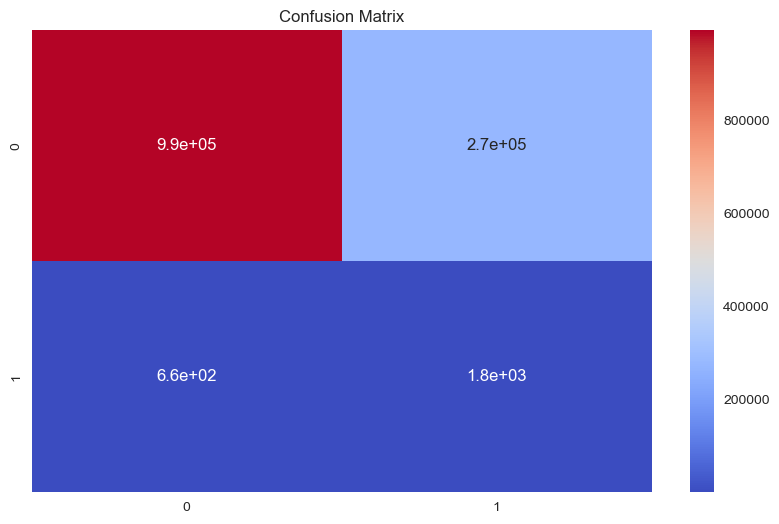

In [ ]:
#random forest classifier with regularization and gridsearch to find the best parameters for the model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 2, verbose=1, n_estimators=100, max_features='auto', min_samples_leaf=1, min_samples_split=2, class_weight='balanced' )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.7s finished


0.7837158530241649


In [ ]:
#show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1266315
           1       0.01      0.73      0.01      2465

    accuracy                           0.78   1268780
   macro avg       0.50      0.76      0.45   1268780
weighted avg       1.00      0.78      0.88   1268780



In [ ]:
#use model to predict on test set
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.3s finished


0.7837158530241649


In [ ]:
#count null in sample_submission
sample_submission.isnull().sum()

PipeId                                      0
YearBuilt                                   0
Diameter                                    0
Length                                      0
Pressure                                    0
NumConnections                              0
NumConnectionsUnder                         0
BoolBridle                                  0
aspect                                      0
Relative_Thickness                          0
pipe_area                                   0
area_connection                             0
connection_bool                             0
gas_natural                                 0
Material_Acrylonitrile-Butadiene-Styrene    0
Material_Copper                             0
Material_Fiberglass-Reinforced Plastic      0
Material_Polyethylene                       0
Material_Polypropylene                      0
Diameter2                                   0
Length2                                     0
Pressure2                         

In [ ]:
sample_submission.head(10)

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,velocity,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,MonthsLastRev,Population density (persons/sqkm),Age_pipe_at_inspection,Incidence
0,446859944,0.82,0.17,0.01,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.10
1,428124500,0.82,0.25,0.02,0.00,0.02,0.00,0,0.00,0.04,0.01,0.00,1,1,0,0,0,1,0,0.07,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.34
2,438428871,0.82,0.17,0.00,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.10
3,429034569,0.82,0.17,0.05,0.00,0.03,0.00,0,0.00,0.03,0.02,0.00,1,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.31
4,411184477,0.73,0.32,0.13,0.00,0.00,0.00,0,0.00,0.05,0.11,0.00,0,1,0,0,0,1,0,0.11,0.02,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.27,0.14
5,428837983,0.82,0.17,0.01,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.10
6,428837841,0.82,0.17,0.02,0.00,0.00,0.00,0,0.00,0.03,0.01,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.10
7,428838331,0.82,0.17,0.01,0.00,0.03,0.00,0,0.00,0.03,0.00,0.00,1,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.30
8,1200432,0.82,0.17,0.02,0.00,0.05,0.00,0,0.00,0.03,0.01,0.00,1,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.36
9,1200564,0.82,0.17,0.00,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.13


In [ ]:
sample_submission.shape

(909733, 40)

In [ ]:
#drop incidence in sample_submission
sample_submission = sample_submission.drop('Incidence', axis=1)

In [ ]:
#make predictions for submission using the model
predictions = rfc.predict_proba(sample_submission)
predictions = predictions[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


In [ ]:
#add predictions to submission
sample_submission ['Incidence'] = predictions

#show submission
sample_submission.head(1)


,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,velocity,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,MonthsLastRev,Population density (persons/sqkm),Age_pipe_at_inspection,Incidence
0,446859944,0.82,0.17,0.01,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.03,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.00,0.00,0.00,0.00,0.17,0.28,0.17,0.30


In [ ]:
sample_submission.columns

Index(['PipeId', 'YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area', 'area_connection', 'connection_bool',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'velocity', 'Average yearly temperature (°C)',
       'Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average year Humidity (%)',
       'Rainy days per year (days)', 'Yearly Sun Hours (hours)',
       'No_Inspections', 'pipe_inspected_frequently', 'No_Previous_Incidences',
       'No_Previous_Severity_High', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_Low', 'MonthsLastRev',
       'Population density (persons/sqkm)', 'Age_pipe_at_inspection',
       'Incidence'],
      dtype='object')

In [ ]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop(['Diameter', 'Length', 'Pressure', 'NumConnections', 'aspect',
       'Relative_Thickness', 'area_connection', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Yearly Sun Hours (hours)',
       'Average_MonthsLastRev', 'MonthsLastRev', 'No_Inspections',
       'No_Incidences_Total', 'Age_pipe_at_inspection',
       'Population density (persons/sqkm)'], axis=1)


KeyError: "['Average_MonthsLastRev', 'No_Incidences_Total'] not found in axis"

In [ ]:

#show kaggle_submission
kaggle_submission.head(10)


In [ ]:
kaggle_submission.shape

In [ ]:
#export kaggle_submission to csv
os.chdir(r"C:\Users\pedro\datathon")

kaggle_submission.to_csv('kaggle_submission_new_features_baseline.csv', index=False)


# Lazypredict

In [ ]:
#using lazypredict to  find the best model to predict on the dataset
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None, predictions=True, random_state=42, n_jobs=-1)
models, predictions = clf.fit(X_train, X_train, X_test, y_test)
models
